# 线性SVM

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import seaborn
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
raw_data  = sio.loadmat('data/ex6data1.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

我们将其用散点图表示，其中类标签由符号表示（+表示正类，o表示负类）。

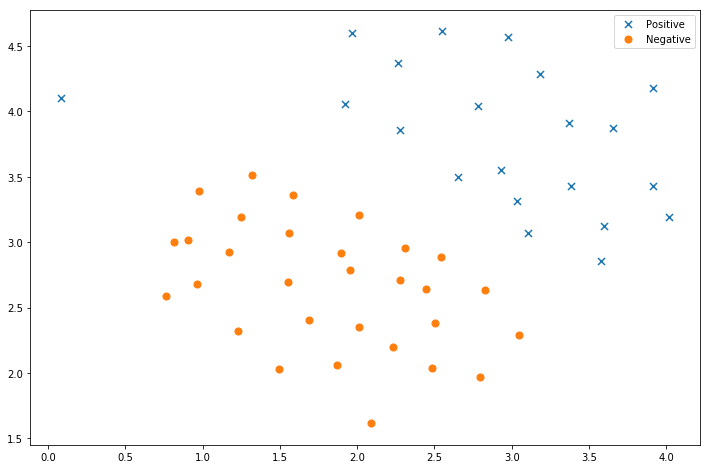

In [3]:
data = pd.DataFrame(raw_data['X'],columns=['x1','x2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['x1'], positive['x2'], s=50, marker='x', label='Positive')
ax.scatter(negative['x1'], negative['x2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

请注意，还有一个异常的正例在其他样本之外。
这些类仍然是线性分离的，但它非常紧凑。 我们要训练线性支持向量机来学习类边界。 用scikit-learn。

# try C =1

In [4]:
svc1 = svm.LinearSVC(C=1,loss='hinge')
svc1.fit(data[['x1','x2']],data['y'])
svc1,svc1.score(data[['x1','x2']],data['y'])

(LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0),
 0.9803921568627451)

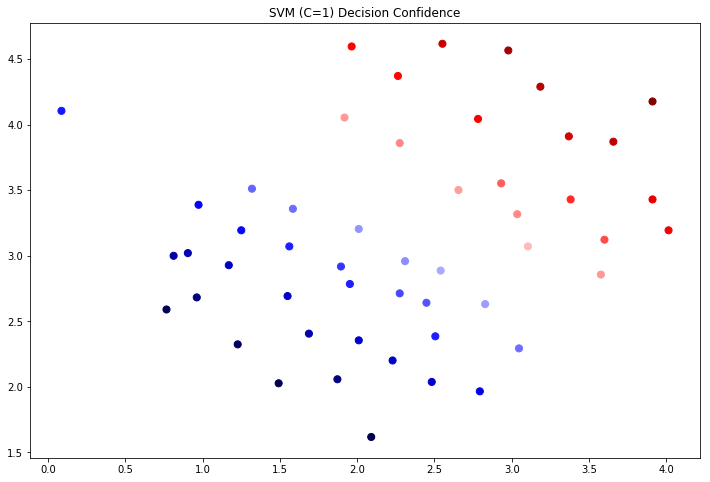

In [5]:
data['SVM 1 Confidence'] = svc1.decision_function(data[['x1', 'x2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['x1'], data['x2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

通过图可以看到异常正例被错误分类了，分给了下边，它本来是属于上边的

# try C =100

其次，让我们看看如果C的值越大，会发生什么

In [6]:
svc2 = svm.LinearSVC(C=100, loss='hinge')
svc2.fit(data[['x1', 'x2']], data['y'])
svc2,svc2.score(data[['x1', 'x2']], data['y'])

(LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0),
 0.9803921568627451)

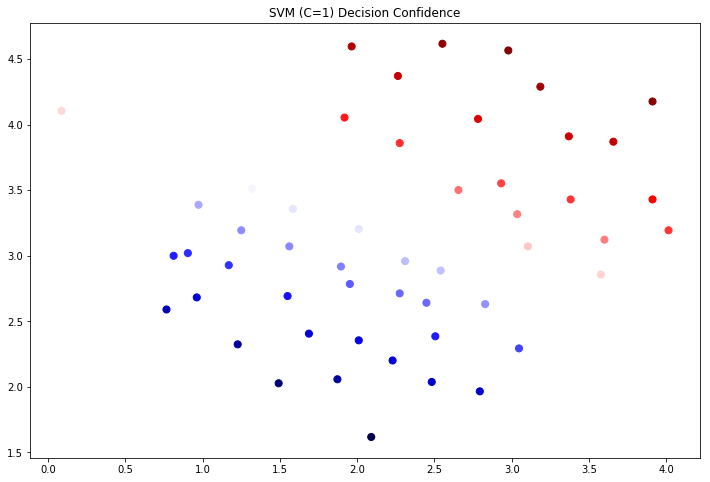

In [7]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['x1', 'x2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['x1'], data['x2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

通过图可以看到异常点正例正确分类了

In [8]:
data.head()

,x1,x2,y,SVM 1 Confidence,SVM 2 Confidence
0,1.9643,4.5957,1,0.799274,4.179270
1,2.2753,3.8589,1,0.381376,2.222079
2,2.9781,4.5651,1,1.373744,5.250142
3,2.9320,3.5519,1,0.518937,2.013367
4,3.5772,2.8560,1,0.332057,0.569404
